In [37]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
wine= load_wine()
data= pd.DataFrame(wine.data, columns=wine.feature_names)
data['target']=wine.target

In [39]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [41]:
X= data.drop('target', axis=1)
y= data['target']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
ypred= rf.predict(X_test)

In [44]:
print('Accuracy:', accuracy_score(y_test, ypred))

Accuracy: 1.0


In [45]:
#confusion matrix
cm= confusion_matrix(y_test, ypred)
cm

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

RandomForest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

In [47]:
df= pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [49]:
A=df.drop('Salary', axis=1)
b=df['Salary']
A_train, A_test, b_train, b_test= train_test_split(A, b, test_size=0.2, random_state=42)

In [50]:
reg= RandomForestRegressor(n_estimators=100, random_state=42, max_depth=3)
reg.fit(A_train, b_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [51]:
bpred= reg.predict(A_test)

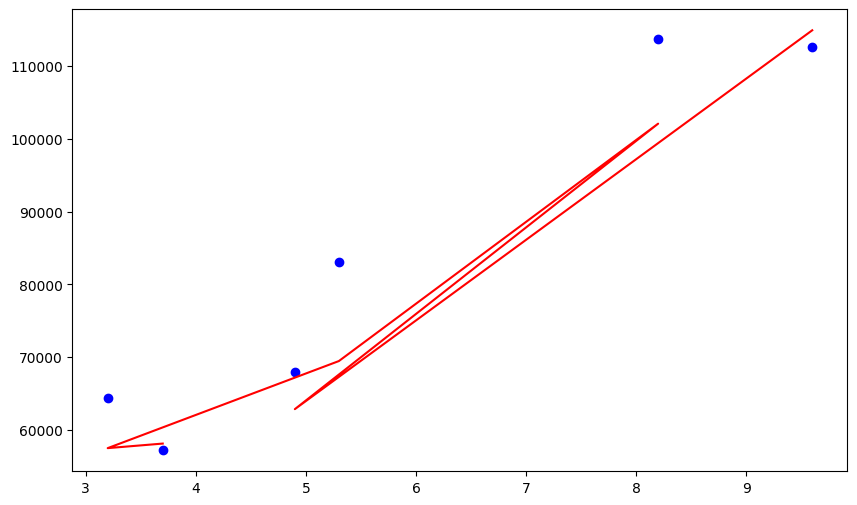

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(A_test, b_test, color='blue')
plt.plot(A_test, bpred, color='red')
plt.show()

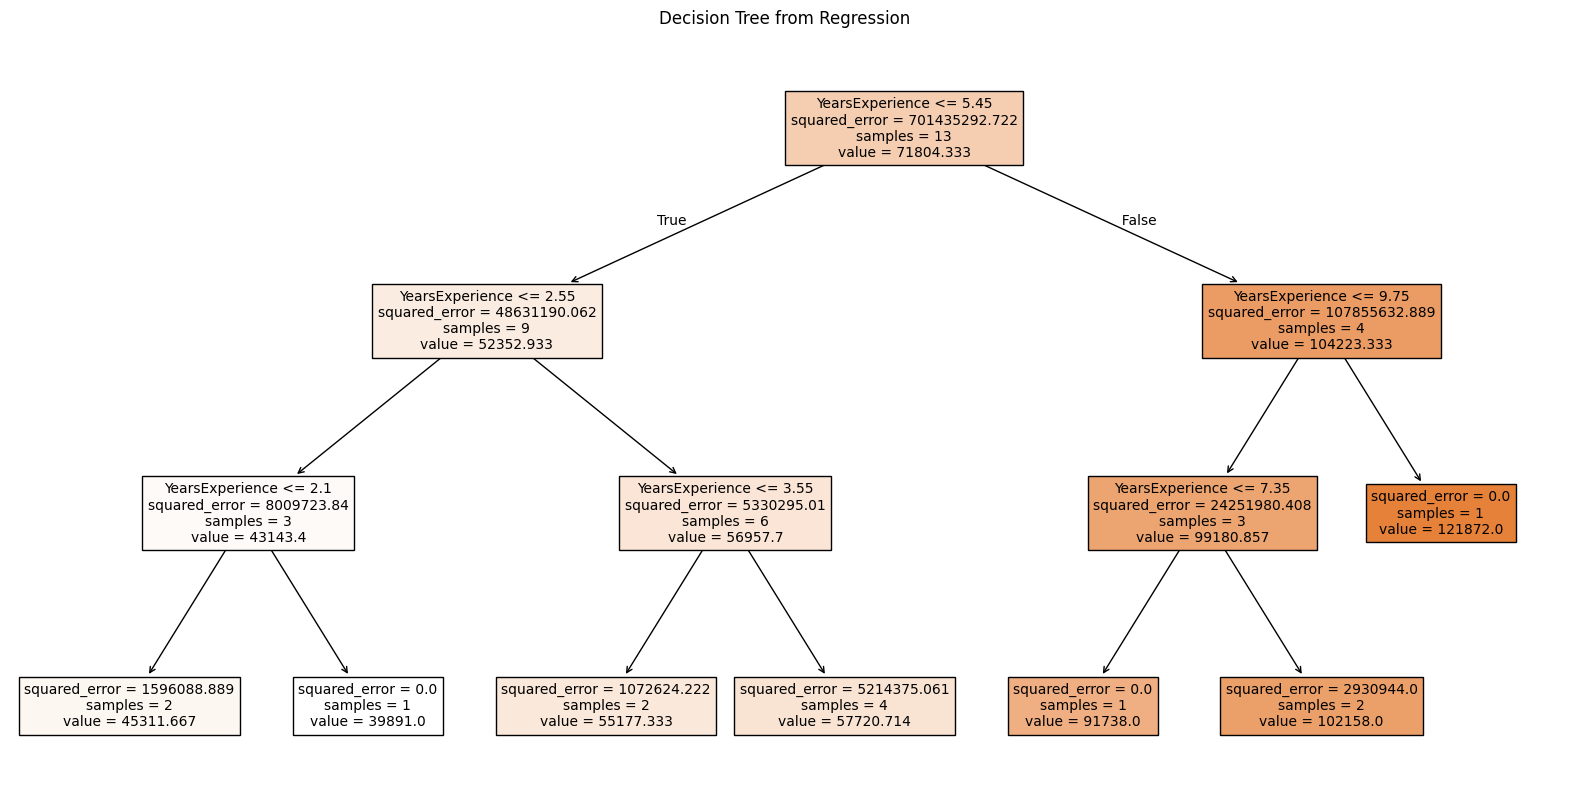

In [53]:
plt.figure(figsize=(20,10))
plot_tree(reg.estimators_[0], feature_names=A.columns, filled=True)
plt.title('Decision Tree from Regression')
plt.show()